<a href="https://colab.research.google.com/github/lanzetti1/Test/blob/main/4%2C1%2C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/lanzetti1/Test/blob/main/PI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercícios de utilização da biblioteca pandas

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Buscando arquivos no google drive

In [3]:
# o arquivo aparece um erro, "ParserError: Error tokenizing data. C error: Expected 1 fields in line 665, saw 2", para permitir que ele não seja lido, coloco uma "," e altero uma condição para false
# df = pd.read_csv("/content/gapminder - gapminder.csv",)
df = pd.read_csv("/content/gapminder_full.csv",)

In [4]:
# Para visualizar os cinco primeiros ítens da lista digito:

df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


Alterando os nomes das colunas de inglês para português e salvando novamente na variável.

In [5]:
df = df.rename(columns={"country":"País", "continent":"Continente", "year":"Ano", "life_exp":"Expectativa de vida", "population":"População","gdp_cap":"PIB"})

# Para exibir as primeiras dez linhas alteramos o parâmetro do head() para head(10)
df.head(10)

,País,Ano,População,Continente,Expectativa de vida,PIB
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106
5,Afghanistan,1977,14880372,Asia,38.438,786.113360
6,Afghanistan,1982,12881816,Asia,39.854,978.011439
7,Afghanistan,1987,13867957,Asia,40.822,852.395945
8,Afghanistan,1992,16317921,Asia,41.674,649.341395
9,Afghanistan,1997,22227415,Asia,41.763,635.341351


Para saber o total de linhas e colunas uso o objeto data frame shape. 

In [6]:
df.shape

(1704, 6)

Para saber o título das colunas.

In [7]:
df.columns

Index(['País', 'Ano', 'População', 'Continente', 'Expectativa de vida', 'PIB'], dtype='object')

Para saber o tipo de dado armazenado.

In [8]:
df.dtypes

País                    object
Ano                      int64
População                int64
Continente              object
Expectativa de vida    float64
PIB                    float64
dtype: object

Para ver as últimas linhas 15 da tabela.

In [9]:
df.tail(15)

,País,Ano,População,Continente,Expectativa de vida,PIB
1689,Zambia,1997,9417789,Africa,40.238,1071.353818
1690,Zambia,2002,10595811,Africa,39.193,1071.613938
1691,Zambia,2007,11746035,Africa,42.384,1271.211593
1692,Zimbabwe,1952,3080907,Africa,48.451,406.884115
1693,Zimbabwe,1957,3646340,Africa,50.469,518.764268
1694,Zimbabwe,1962,4277736,Africa,52.358,527.272182
1695,Zimbabwe,1967,4995432,Africa,53.995,569.795071
1696,Zimbabwe,1972,5861135,Africa,55.635,799.362176
1697,Zimbabwe,1977,6642107,Africa,57.674,685.587682
1698,Zimbabwe,1982,7636524,Africa,60.363,788.855041


Para saber dados estatísticos da tabela

In [10]:
df.describe()

,Ano,População,Expectativa de vida,PIB
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


Para fazer um filtro com os dados.Se quizer saber quais os continentes que compoem o cenário.

In [11]:
df["Continente"].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

Sabendo os continentes, posso criar uma variável para ver os paíse que compõem aquele continente.

In [12]:
Oceania = df.loc[df["Continente"] == "Oceania"]
Oceania.head()

,País,Ano,População,Continente,Expectativa de vida,PIB
60,Australia,1952,8691212,Oceania,69.12,10039.59564
61,Australia,1957,9712569,Oceania,70.33,10949.64959
62,Australia,1962,10794968,Oceania,70.93,12217.22686
63,Australia,1967,11872264,Oceania,71.10,14526.12465
64,Australia,1972,13177000,Oceania,71.93,16788.62948


Fazendo um novo filtro

In [13]:
Oceania["Continente"].unique()

array(['Oceania'], dtype=object)

Para agrupar dados por continente e saber quantos são os países

In [14]:
df.groupby("Continente")["País"].nunique()

Continente
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: País, dtype: int64

Para saber a expectativa de vida média por ano.

In [15]:
df.groupby("Ano")["Expectativa de vida"].mean()

Ano
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: Expectativa de vida, dtype: float64

Par saber o PIB médio e a soma do PIB.

In [16]:
df["PIB"].mean()


7215.327081212149

In [17]:
df["PIB"].sum()

12294917.346385501

Visualização de Dados.
Trabalhando com gráficos.

<Axes: >

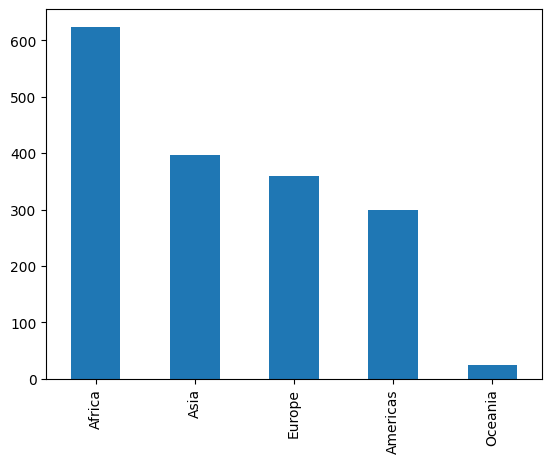

In [18]:
# Criando um gráfico de barras
df["Continente"].value_counts(ascending = False).plot.bar()

<Axes: >

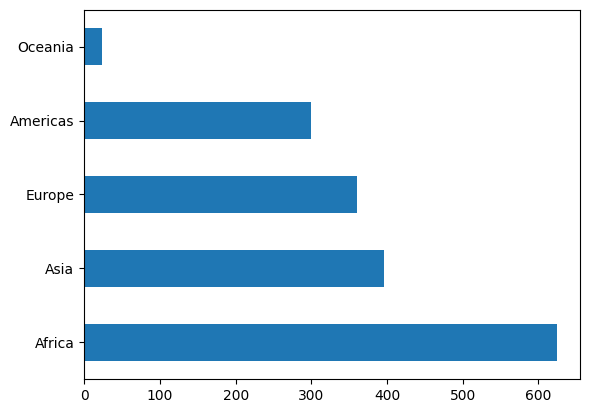

In [19]:
# Criando um gráfico de barras horizontais. A letra h em barh inverte o sentido.

df["Continente"].value_counts(ascending = False).plot.barh()

<Axes: >

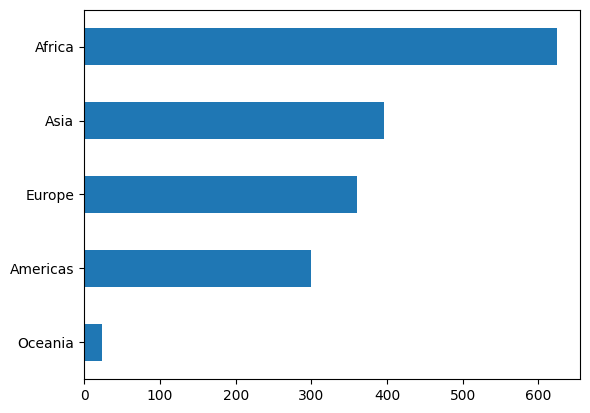

In [20]:
df["Continente"].value_counts(ascending = True).plot.barh()

Para eleminar a linha acima do gráfico"<AxesSubplot:>", basta colocar um ";" ao final.

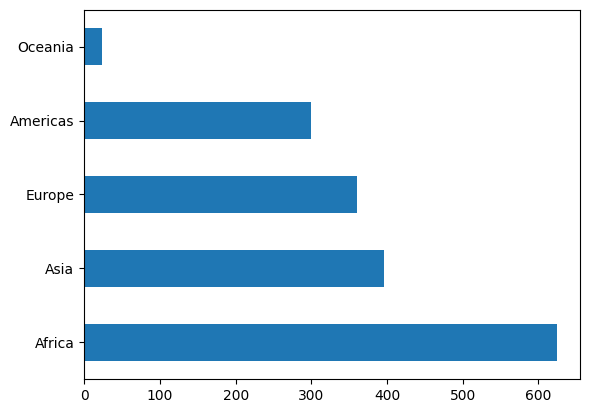

In [21]:
df["Continente"].value_counts().plot.barh();

Para fazer um "Gráfico de Pizza", utilizamos o comando abaixo.

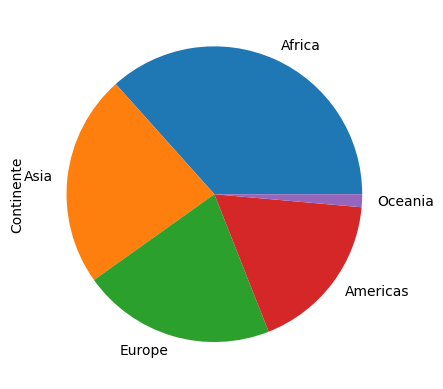

In [22]:
df["Continente"].value_counts().plot.pie();

Para adicionar um título e alterar o nome dos eixos. Preciso importar a biblioteca matplotlib.

Text(0, 0.5, 'População')

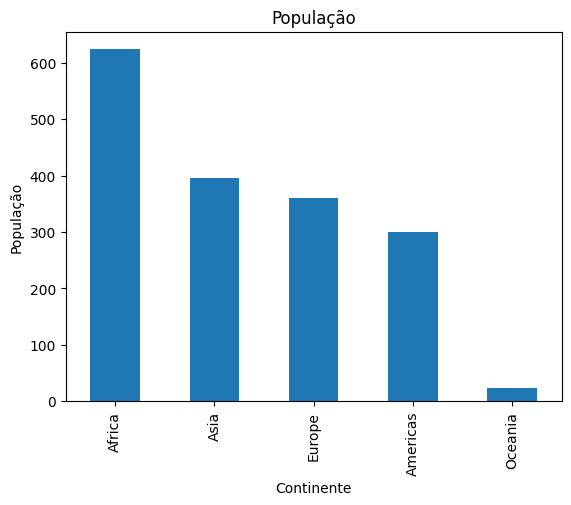

In [23]:
import matplotlib.pyplot as plt

df["Continente"].value_counts().plot.bar(title ="População");

plt.xlabel("Continente")
plt.ylabel("População")

Alterando o estilo do gráfico.

In [24]:
plt.style.use("ggplot")


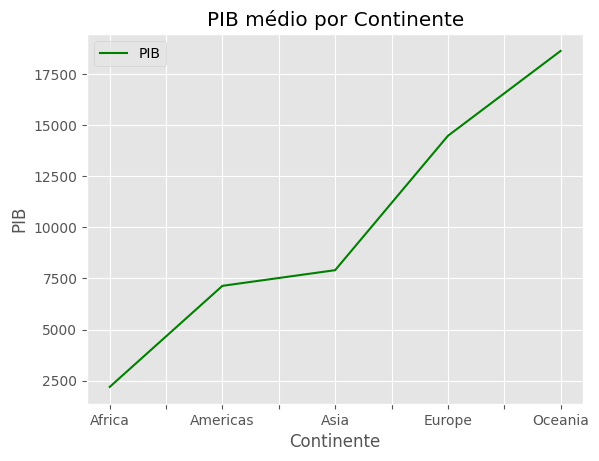

In [25]:
df.groupby(df["Continente"])["PIB"].mean().plot(title ="PIB médio por Continente", color = "green")

plt.xlabel("Continente")
plt.ylabel("PIB")
plt.legend();

Podemos escolher a cor aquihttps://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py para criar um histograma.

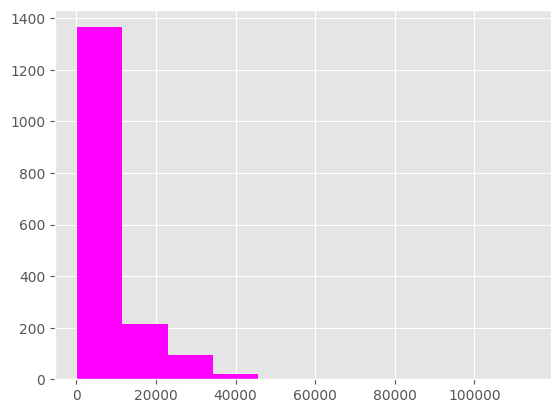

In [26]:
plt.hist(df["PIB"], color="magenta");

Base de dados

In [27]:
from __future__ import absolute_import, division, print_function, unicode_literals
import functools

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import pandas as pd
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import math
import seaborn as sns

import numpy as np

# Facilitar a leitura de valores numpy.
np.set_printoptions(precision=3, suppress=True)

from tensorflow.python import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.python.keras.models import Sequential

!pip install keras-tuner --upgrade

import keras_tuner


print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.12.0


Carregar dados CSV. https://www.tensorflow.org/tutorials/load_data/csv?hl=pt-br

Fazer download do arquivo csv que contém o conjunto de dados do gapminder

In [28]:
csv_file = tf.keras.utils.get_file("Downloading data from{gapminder.csv}", 'https://drive.google.com/file/d/1ruWC53LspZnOdJEAXSLMXBJsDItRPLFN/view?usp=drive_link')
#csv_file = tf.keras.utils.get_file('gapminder_full.csv', '/content/gapminder - gapminder.csv')

Ler o arquivo csv utilizando o pandas

In [29]:
#df = pd.read_csv('/content/gapminder_full.csv')

In [30]:
df.head()

,País,Ano,População,Continente,Expectativa de vida,PIB
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [31]:
df.dtypes

País                    object
Ano                      int64
População                int64
Continente              object
Expectativa de vida    float64
PIB                    float64
dtype: object

csv_file = tf.keras.utils.get_file("Downloading data from{gapminder.csv}", '/content/gapminder_full.csv')

##### Copyright 2018 The TensorFlow Authors.

In [32]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [33]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Regressão: Preveja consumo de combustível

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/regression"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Veja em TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Execute em Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/pt-br/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Veja a fonte em GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/pt-br/tutorials/keras/regression.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Baixe o notebook</a>
  </td>
</table>

Note: A nossa comunidade TensorFlow traduziu estes documentos. Como as traduções da comunidade são *o melhor esforço*, não há garantias de que sejam uma reflexão exata e atualizada da [documentação oficial em Inglês](https://www.tensorflow.org/?hl=en). Se tem alguma sugestão para melhorar esta tradução, por favor envie um pull request para o repositório do GitHub [tensorflow/docs](https://github.com/tensorflow/docs). Para se voluntariar para escrever ou rever as traduções da comunidade, contacte a [lista docs@tensorflow.org](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

Em um problema de regressão, o objetivo é prever as saídas (*outputs*) de um valor contínuo, como um preço ou probabilidade. Em contraste de problemas de classificação, onde temos o propósito de escolher uma classe em uma lista de classificações (por exemplo, se uma imagem contém uma maçã ou laranja, assim reconhecendo qual fruta é representada na imagem).

Este *notebook* usa a clássica base de dados [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) e constrói um modelo para prever a economia de combustíveis de automóveis do final dos anos 1970, início dos anos 1980. Para isso, forneceremos um modelo com descrição de vários automóveis desse período. Essa descrição inclui atributos como: cilindros, deslocamento, potência do motor, e peso.

Este exemplo usa a API `tf.keras`. Veja [este guia](https://www.tensorflow.org/guide/keras) para mais detalhes.

In [34]:
# Use seaborn para pairplot
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Base de dados Gapminder

A base de dados está disponível  em [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).(https://github.com/lanzetti1/Test/blob/main/PI4/gapminder_full.csv)


### Pegando os dados
Primeiro baixe a base de dados dos automóveis.

In [35]:
#dataset_path = keras.utils.get_file("gapminder.csv", "/content/gapminder_full.csv")
#dataset_path

Utilizando o pandas, importe os dados:País	Ano	População	Continente	Expectativa de vida	PIB

In [36]:
#column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
 #               'Acceleration', 'Model Year', 'Origin']

# column_names = ['País','Ano','População','Continente','Expectativa de vida', 'PIB']

#raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
#  raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = ["??"], comment='\t', sep=" ", skipinitialspace=True)

raw_dataset = df
dataset = raw_dataset.copy()
dataset.tail()

,País,Ano,População,Continente,Expectativa de vida,PIB
1699,Zimbabwe,1987,9216418,Africa,62.351,706.157306
1700,Zimbabwe,1992,10704340,Africa,60.377,693.420786
1701,Zimbabwe,1997,11404948,Africa,46.809,792.449960
1702,Zimbabwe,2002,11926563,Africa,39.989,672.038623
1703,Zimbabwe,2007,12311143,Africa,43.487,469.709298


### Limpe os dados

Esta base contém alguns valores não conhecidos (*unknown*).

In [37]:
dataset.isna().sum()

País                   0
Ano                    0
População              0
Continente             0
Expectativa de vida    0
PIB                    0
dtype: int64

Para manter esse tutorial básico, remova as linhas com esses valores não conhecidos.

In [38]:
dataset = dataset.dropna()

A coluna "Continente" é uma coluna categórica e não numérica. Logo converta para *one-hot* :

In [39]:
Continente = dataset.pop('Continente')

In [40]:
dataset['Africa'] = (Continente == 1)*1.0
dataset['Americas'] = (Continente == 2)*1.0
dataset['Asia'] = (Continente == 3)*1.0
dataset['Europa'] = (Continente == 4)*1.0
dataset['Oceania'] = (Continente == 5)*1.0
dataset.tail()

,País,Ano,População,Expectativa de vida,PIB,Africa,Americas,Asia,Europa,Oceania
1699,Zimbabwe,1987,9216418,62.351,706.157306,0.0,0.0,0.0,0.0,0.0
1700,Zimbabwe,1992,10704340,60.377,693.420786,0.0,0.0,0.0,0.0,0.0
1701,Zimbabwe,1997,11404948,46.809,792.449960,0.0,0.0,0.0,0.0,0.0
1702,Zimbabwe,2002,11926563,39.989,672.038623,0.0,0.0,0.0,0.0,0.0
1703,Zimbabwe,2007,12311143,43.487,469.709298,0.0,0.0,0.0,0.0,0.0


### Separando dados de treinamento e teste

Agora separe os dados em um conjunto de treinamento e outro teste.

Iremos utilizar o conjunto de teste no final da análise do modelo.

In [41]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

### Inspecione o dado

Dê uma rápida olhada em como está a distribuição de algumas colunas do conjunto de treinamento.

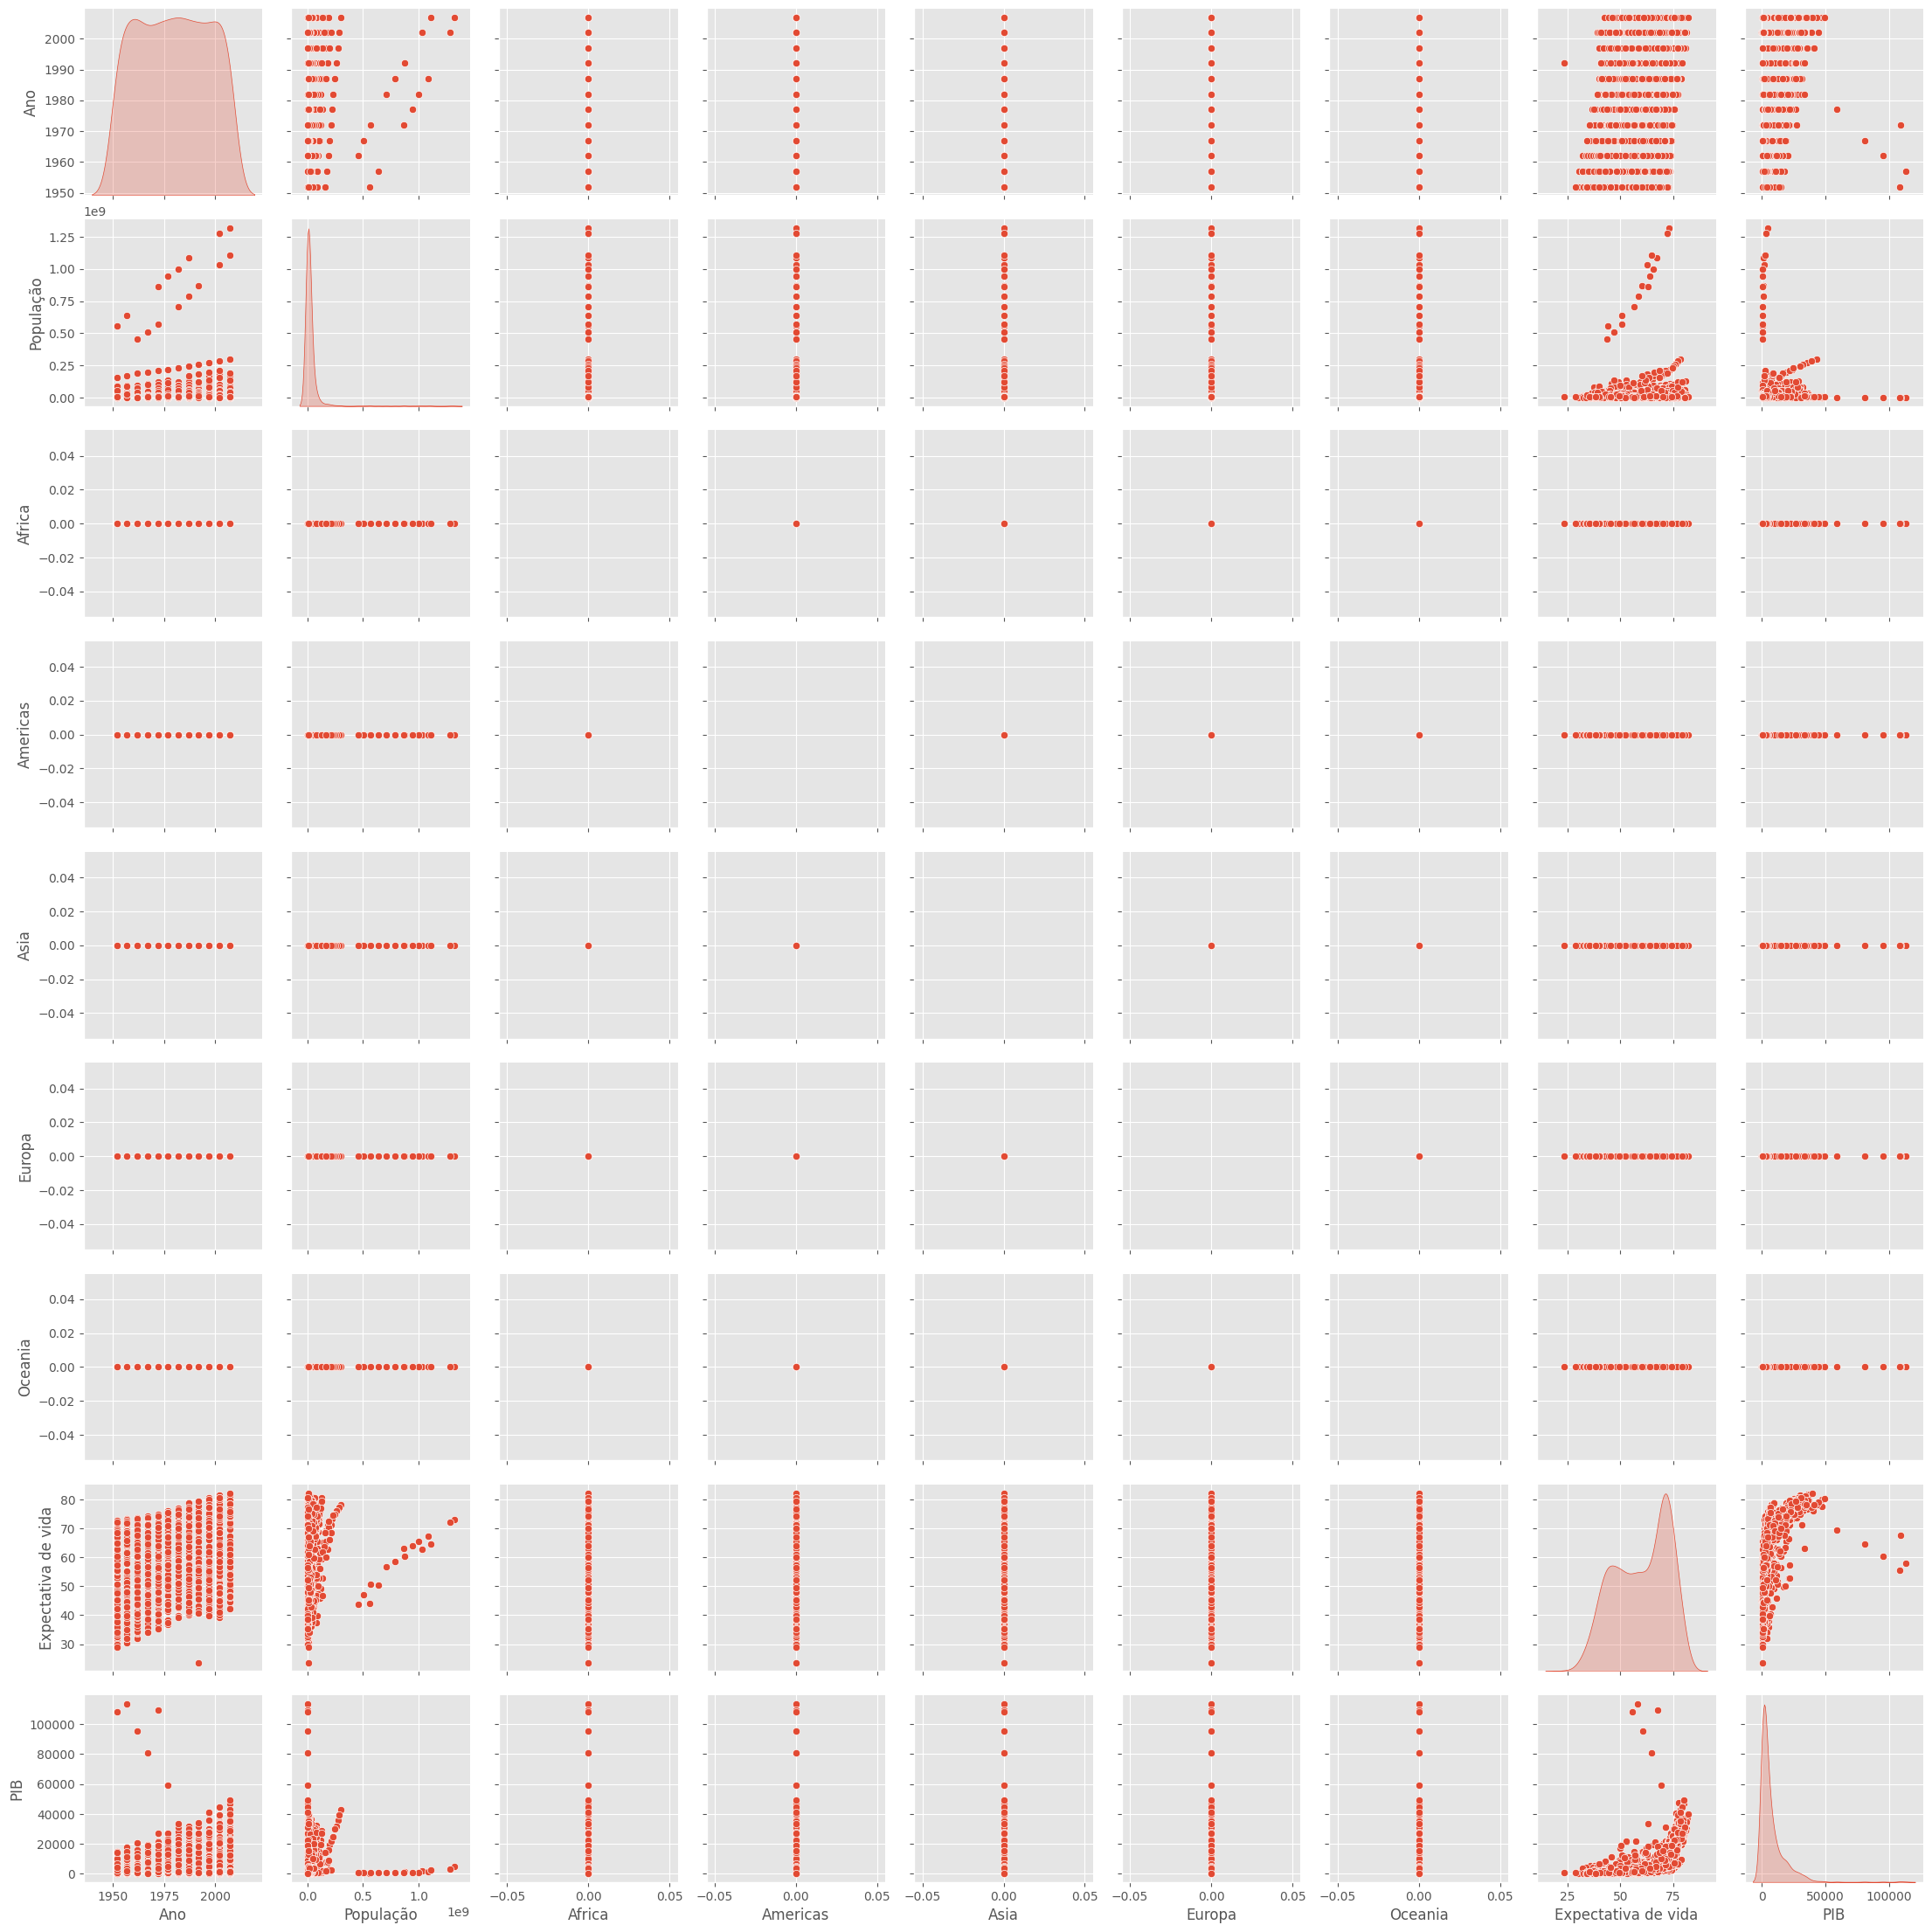

In [42]:
sns.pairplot(train_dataset[["Ano", "População", "Africa",	"Americas",	"Asia",	"Europa",	"Oceania","Expectativa de vida", "PIB"]], diag_kind="kde")

Repare na visão geral das estatísticas:

In [43]:
train_stats = train_dataset.describe()
train_stats.pop("Expectativa de vida")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Ano,1363.0,1.979623e+03,1.722802e+01,1952.000000,1.962000e+03,1.982000e+03,1.997000e+03,2.007000e+03
População,1363.0,2.848559e+07,1.003372e+08,60011.000000,2.881164e+06,7.272485e+06,2.034663e+07,1.318683e+09
PIB,1363.0,7.474522e+03,1.029252e+04,241.165876,1.225949e+03,3.726064e+03,9.629440e+03,1.135231e+05
Africa,1363.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Americas,1363.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Asia,1363.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Europa,1363.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Oceania,1363.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Separe features de labels

Separe o valor alvo (*labels*), das *features*. Esta label é o valor no qual o model é treinado para prever.

In [44]:
train_labels = train_dataset.pop('Expectativa de vida')
test_labels = test_dataset.pop('Expectativa de vida')

### Normalize os dados

Olhe novamente para o bloco `train_stats` acima e note quão diferente é a variação de feature.

Uma boa prática é normalizar as *features* que usam diferentes escalas e intervalos. Apesar do modelo poder convergir sem a normalização, isso torna o treinamento mais difícil, e torna o resultado do modelo dependente da escolha das unidades da entrada.

Note: embora geramos intencionalmente essas estatísticas para os dados de treinamento, essas estatísticas serão usadas também para normalizar o conjunto de teste. Precisamos delinear o conjunto de teste na mesma distribuição que o modelo foi treinado. 

In [45]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

O dado normalizado é o que nós usaremos para treinar o modelo.

Caution: A estatística usada para normalizar as entradas aqui (média e desvio padrão) precisa ser aplicada em qualquer outro dado que alimenta o modelo, junto com o codificação one-hot que fizemos mais cedo.  Isso inclui o conjunto de teste, assim como dados que o modelo usará em produção.

## O Modelo

### Construindo o modelo

Vamos construir o modelo. Aqui usaremos o modelo `Sequential` com duas camadas *densely connected*, e a camada de saída que retorna um único valor contínuo. Os passos de construção do modelo são agrupados em uma função, `build_model`, já que criaremos um segundo modelo mais tarde.

In [46]:
#def build_model():
#  model = keras.Sequential([
#   layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
#   layers.Dense(64, activation='relu'),
#   layers.Dense(1)
#  ])

#  optimizer = tf.keras.optimizers.RMSprop(0.001)

# model.compile(loss='mse',
#                optimizer=optimizer,
#                metrics=['mae', 'mse'])
#  return model/#


In [47]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Choice('units', [8, 16, 32]),
      activation='relu'))
  model.add(keras.layers.Dense(1, activation='relu'))
  model.compile(loss='mse')
  return model

In [48]:
from statistics import stdev
from statsmodels.tsa.seasonal import seasonal_decompose

In [53]:
import scipy
from scipy.io import arff
#data, meta = scipy.io.arff.loadarff(/content/gapminder_full.csv)



from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split

# this will generate a random multi-label dataset
X, y = make_multilabel_classification(sparse = True, n_labels = 20,
return_indicator = 'sparse', allow_unlabeled = False)

# using binary relevance
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


0.7272727272727273

In [54]:
from sklearn.preprocessing import StandardScaler
s =StandardScaler()
X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

ValueError: ignored

In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5)

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
best_model = tuner.get_best_models()[0]

###  Examine o modelo

Use o método `.summary` para exibir uma descrição simples do modelo.

In [ ]:
#model.summary()

tuner.results_summary()

Agora teste o modelo. Pegue um batch de 10 exemplos do conjunto de treinamento e chame `model.predict` nestes.

In [ ]:
#example_batch = normed_train_data[:10]
#example_result = model.predict(example_batch)
#example_result

Parece que está funcionando e ele produz o resultado de forma e tipo esperados.

### Treinando o modelo

Treine o modelo com 1000 *epochs*,  e grave a acurácia do treinamento e da validação em um objeto `history`. 

In [ ]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Visualize o progresso do modelo de treinamento usando o estados armazenados no objeto `history`

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [Expectativa de vida]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

Este grafo mostra as pequenas melhoras, ou mesmo a diminuição do `validation error` após 100 *epochs*. Vamos atualizar o `model.fit` para que pare automaticamente o treinamento quando o `validation score` não aumentar mais. Usaremos o `EarlyStopping callback` que testa a condição do treinamento a cada `epoch`.  Se um grupo de `epochs` decorre sem mostrar melhoras, o treinamento irá parar automaticamente.

Você pode aprender mais sobre este callback [aqui](https://www.tensorflow.org/versions/master/api_docs/python/tf/keras/callbacks/EarlyStopping).

In [ ]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

O gráfico mostra que no conjunto de validação, a média de erro é próximo de +/- 2MPG. Isso é bom? Deixaremos essa decisão a você.

Vamos ver quão bem o modelo generaliza usando o conjunto de **teste**, que não usamos para treinar o modelo. Isso diz quão bem podemos esperar que o modelo se saia quando usarmos na vida real.

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Expectativa de vida".format(mae))

### Faça predições

Finalmente, prevejam os valores MPG usando o conjunto de teste.

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Expectativa de vida]')
plt.ylabel('Predictions [Expectativa de vida]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


Parece que o nosso modelo prediz razoavelmente bem. Vamos dar uma olhada na distribuição dos erros.

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Expectativa de vida]")
_ = plt.ylabel("Count")

Não é tão gaussiana, porém podemos esperar que por conta do número de exemplo é bem pequeno.

## Conclusão

Este notebook introduz algumas técnicas para trabalhar com problema de regressão.

* Mean Squared Error(MSE), é uma função comum de *loss* usada para problemas de regressão (diferentes funções de *loss* são usadas para problemas de classificação).
* Similarmente, as métricas de evolução usadas na regressão são diferentes da classificação. Uma métrica comum de regressão é  Mean Absolute Error (MAE).
* Quando o dado de entrada de *features*  tem diferentes intervalos, cada *feature* deve ser escalada para o mesmo intervalo.
* Se não possuir muitos dados de treinamento, uma técnica é preferir uma pequena rede com poucas camadas para evitar *overfitting*.
* *Early stopping* é uma boa técnica para evitar *overfitting*.

In [ ]:
import tensorflow as tf

def get_model(n_x, n_h1, n_h2):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(n_h1, input_dim=n_x, activation='relu'))
    model.add(tf.keras.layers.Dense(n_h2, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

    return model

# Main Objectives:  
The scope of this project is to build several deep learning algorithms based on RNN
techniques which can predict future values of an indicator using Time-Series Forecasting methods in order to achieve the highest possible accuracy. This can be broken down into the following milestones:  

1. Data Exploration and evaluation of Stationarity.  
2. Modeling and selection of best model.  
3. Prediction of future values.  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

df=pd.read_csv('../input/time-series-forecasting-with-yahoo-stock-price/yahoo_stock.csv')

In [ ]:
from keras.optimizers import Adam
import statistics

In [ ]:
df.head()

In [ ]:
df.shape

Our dataset contains 6 columns of indicators and date columns which will be then set as index. Now let's see if the dates are unique or if there are duplicate values.

In [ ]:
len(df['Date'].unique())

As there are 1825 unique dates means that each one corresponds to unique records in the table, therefore we don't have duplicated or inconsistent values.

In [ ]:
df.info()

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

As the date column is wrongly set as object type, let's change it to Datetime type:

In [ ]:
df.Date=pd.to_datetime(df['Date'])

In [ ]:
df.Date.min(),df.Date.max()

Let's compute the amount of days between the limits in the table, i.e. 2020-11-20/2015-11-23, take into account that the result will give us the days-1:

In [ ]:
df.Date.max()-df.Date.min()

Setting the date as index will make our time series plots much more understandable.

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
df.head()

Let's plot four of the indicators in the table and differentiate their corresponding curves by colours.

In [ ]:
df[['High','Low','Open','Close']].plot(figsize = (15, 5), alpha = 0.5)

The four had almost same behaviour troughout time and based on this assumption in this project we will only focus on one of them 'High' in order to build a model which could predict future values and then as possible suggestions extrapolate such model to other indicators.  
Firstly, we will demonstrate if the time-series problem corresponds to a Non-Stationary type, which characterizes for having:  
- Non-constant variance.  
- Non-constant mean.  
- Seasonality.  
- High autocorrelation. 

There are four well known ways to evaluate if the serie meets the criteria just mentioned, these corresponds to:  
- Sequence visualization.
- Histogram, Autocorrelation and Partial Aurocorrelation plots.
- Statistical summary of chunks.
- Adfuller test.



# Evaluating Stationarity:

The following histogram plot should have a uniform distribution meaning non-constant mean or 'trend':

In [ ]:
df.High.hist(bins=50)

We can't assume a uniform nor normal distribution in the plot above, because of that the statistical summary can helps us more, for this we will split the data into 10 chunks and compute mean and variance of each one.

In [ ]:
np.round(df.shape[0]/10,0)

In [ ]:
from statistics import stdev
mean=[]
std=[]
    
for i in range(0,10):
    mean.append(df['High'].iloc[(i*182):(i*182)+182].mean())
    std.append(stdev(df['High'].iloc[(i*182):(i*182)+182]))

In [ ]:
pd.concat([pd.DataFrame(mean,columns=['mean']),pd.DataFrame(std,columns=['std'])], axis=1)

Above we see how both measures are clearly different in each chunk. However looking at the plot we could assume a constant variance as the ripple in the curve, but without a doubt trend is the most outstanding feature. Until now can assume it's a non-stationary serie, but to know more about it we will evaluate two other methods.  
Seasonal decomposition is a function from statsmodels library which allows us to decompose the serie into trend, seasonal and residual, either additive or multiplicative:

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decompose_add=seasonal_decompose(df['High'], model='additive', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_add.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_add.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_add.resid, label='Residual')
plt.legend(loc='best')

In [ ]:
decompose_mul=seasonal_decompose(df['High'], model='multiplicative', period=12)
plt.figure(figsize=(15,15))
plt.subplot(411)
plt.plot(df['High'], label='Original TS')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decompose_mul.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decompose_mul.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decompose_mul.resid, label='Residual')
plt.legend(loc='best')

Looking carefully to the original curve we can say the additive decomposition makes more sense as the trend does not seem to be changing by the multiplication with seasonal component, rather every component seems to being added up to create the original curve. Independent of this there is a trend and seasonal component.  
Below we can see the ACF and PACF plots:

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_acf(df['High'])
print()

In [ ]:
plt.rc("figure", figsize=(10,5))
plot_pacf(df['High'])
print()

Finally, we will make the Augmented Dickey-Fuller test, using 5% as significance level and declaring the following hypothesis:
- H0= Serie corresponds to non-stationary type.
- H1= Serie corresponds to stationary type.

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
result = adfuller(df['High'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

As p-value is greater than 0.05 we fail to reject the null hypothesis, therefore there is not enough evidence to reject that we are working with a non-stationary series. Let's apply the log transformation to the serie and test again.

In [ ]:
from numpy import log

result = adfuller(log(df['High']))
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Based on every method applied we can endorse the serie clearly corresponds to a non-stationary type, which means that we have to convert this to stationary by using filters and complex transformations. However, deep learning approaches can lead us to build models which takes into account all of these characteristics and predict future values modestly, but as disadvantage it would take significantly more time to train such models. 

# Modeling:  
In order to choose the best model 4 changes in hyperparameters and architecture will be applied and then evaluate each one by computing their corresponding error metrics. The purpose of this method is to find the appropriate characteristics of the model by looking at the effect of regularization, window length, number of epochs and type of cell. Each step will be denominated ‘comparison’ and are detailed as follows:  

● 1st comparison, model with 7 different window length.  
● 2nd comparison, model with more layers, neurons and epochs.  
● 3rd comparison, model with regularization.  
● 4th comparison, model using SimpleRNN vs LSTM.  

Firstly, we will define a new dataset equal to the existing one, but omitting the last four records, later we will use the model to predict such values.

In [ ]:
new_df=df['High'].iloc[:-4]

We define the length of the training set as 80% of the total records (specifically the first 80% of data, i.e.: from record 0 to record 1456):

In [ ]:
train_len = math.ceil(len(new_df)*0.8)
train_len

Let's use 10 as a random window to be used in the model to build:

In [ ]:
window=10

The following lines create the training sets, as we now the first row takes the first 10 time steps and then the second row takes time steps shifted in one and so on and so forth:

In [ ]:
train_data = new_df[0:train_len]

X_train=[]
Y_train=[]

for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

In [ ]:
X_train, Y_train= np.array(X_train), np.array(Y_train)

Reshaping the training set to (number of records-window, number of time steps, 1):

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

In [ ]:
X_train

The following is the first model to be used, this is relatively simple with one LSTM layer with relu activation function and one hidden fully connected layer, the optimizer used is Adam, number of epochs=10, batch_size=10 and loss function=Mean squared error:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model=Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)

Creating the validation set using same logic as training:

In [ ]:
test_data = new_df[train_len-window:]

X_val=[]
Y_val=[] 

for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])

In [ ]:
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

In [ ]:
X_val.shape, Y_val.shape

Now that our validation set has the correct shape we can use it in the model to predict the next value.

In [ ]:
prediction = model.predict(X_val)

In [ ]:
len(prediction), len(Y_val)

As our prediction and actual values have the same shape we can use these sets to compute the error metrics, in this case we will use RMSE.

In [ ]:
from sklearn.metrics import mean_squared_error

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

Both errors are high, if we specifically see the validation one we could say it's too much and we aim to improve this as we build a robust model in the next steps.  
Below is a table which merged the actual and predicted values, therefore we can see for each record how differ these two and have an idea of how sidetracked we currently are.

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

Below we can see a simple plot showing both curves, in which clearly there is a difference and a sort of shift to the right or delay in the prediction curve.

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Finally, the plot showing training, validation and prediction curves:

In [ ]:
train = new_df[:train_len]
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

plt.figure(figsize=(16,8))
plt.title('Model LSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train)
plt.plot(valid[['High','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

## 1st comparison:  
In order to tackle down this 'shift' and thus reduce the error we have to find the suit window number, for this we will compute the RMSE for the following number of windows: 5,8,10,15,20,30,40. Then compare results and find the lowest.  

In [ ]:
train_error=[]
val_error=[]

window_number=[5,8,10,15,20,30,40]
for i in window_number:
    #_____________________________________________________________________
    train_data = new_df[0:train_len]

    X_train=[]
    Y_train=[]

    for i in range(window, len(train_data)):
        X_train.append(train_data[i-window:i])
        Y_train.append(train_data[i])

    X_train, Y_train= np.array(X_train), np.array(Y_train)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    #______________________________________________________________________
    test_data = new_df[train_len-window:]

    X_val=[]
    Y_val=[] 

    for i in range(window, len(test_data)):
        X_val.append(test_data[i-window:i])
        Y_val.append(test_data[i])

    X_val, Y_val = np.array(X_val), np.array(Y_val)
    X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
    #______________________________________________________________________
    model=Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=10, batch_size=10, verbose=0)
    #______________________________________________________________________
    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    train_error.append(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
    val_error.append(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

In [ ]:
train_error

In [ ]:
val_error

The following table shows the RMSE of train and validation sets for each of the 7 windows:

In [ ]:
pd.concat([pd.DataFrame(train_error,columns=['train_error']),
           pd.DataFrame(val_error,columns=['val_error']),
           pd.DataFrame([5,8,10,15,20,30,40],columns=['window'])], axis=1).set_index('window')

**Note: Each time that I ran the prior code of 7 windows the outcome was different**, but in general the behaviour was as in the table above, having window=10 the lowest RMSE for validation set. Thus this number was chosen as the best predictor. Even though before we have seen how for this value the shift was significant for all other windows this difference was much more, but there are still more hyperparameters to tune in order to improve the accuracy.

## 2nd comparison:  
One efficient way to improve the accuracy is by simply increasing the complexity of the model and this can be achieved adding more layers and more LSTM cells. Therefore in this step we will build a multilayered model and compare its performance with the prior.  
Firstly, let's create again the training and validation sets for 10 windows to be used.


In [ ]:
window=10

train_data = new_df[0:train_len]
X_train=[]
Y_train=[]
for i in range(window, len(train_data)):
    X_train.append(train_data[i-window:i])
    Y_train.append(train_data[i])

X_train, Y_train= np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#____________________________________________________________________
test_data = new_df[train_len-window:]
X_val=[]
Y_val=[] 
for i in range(window, len(test_data)):
    X_val.append(test_data[i-window:i])
    Y_val.append(test_data[i])
    
X_val, Y_val = np.array(X_val), np.array(Y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))

The following is the architecture of the model to be used (2 LSTM layers and 2 hidden fully-connected layers), the optimizer is more specific and the number of epochs was increased to 100:

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
model.compile(loss='mean_squared_error', optimizer=opt1)
model.summary()
model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)

In the summary above we can see that the total parameters of this new model is three times or even more than the prior which is indicative of the complexity and the time it takes to train.

In [ ]:
lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
print('Train rmse:', np.sqrt(mean_squared_error(Y_train, lstm_train_pred)))
print('Validation rmse:', np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)))

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Despite the fact that error metrics were lower than before in the plot above still can see a gap between the actual and predicted values. Again, I've found that each time I ran this model the results were different and the current output corresponds to the very best one, but in order to better vizualize this I will run 10 times the same model and compute the errors in each one.

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

Below we can see the RMSE for each time, note that these are considerably different, being still more impactful in the validation set.

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)

In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)

We can see how validation errors are higher than training and also more spreaded because of such stardard deviation.

## 3rd comparison:   
As the validation errors were still considerably higher than training we think one reason could be due to overfitting and for this problem we have to add regularization to the model chosen by using Dropout after Fully Connected layers and LSTM cells. In this step we will run a regularized model again 10 times in order to see the variation in the results:

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(LSTM(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1),recurrent_dropout=0.2))
    model.add(LSTM(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dropout(0.2))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)

In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)

We can see above how these values either training or validation were higher than without dropout, which is definitely not good.  
**Note:** Different levels of dropout were used above from 0.1 to 0.6 obtaining similar or higher errors. Now that we saw dropout did not reduce the errors we can not attribute the problem to overfitting and a different approach must be taken. For your consideration I have also changed the optimizer to Adadelta, Adamax, RMSProp and SGD but everyone had higher error or simply did not work, the activation function was changed to tanh and sigmoid obtaining similar errors.


## 4th comparison:  
Until now every model built does not offer us a good accuracy, as we are dealing with the budget of a company this results can lead to a completely wrong decision, but as I said there is still a room of improvement and different approaches must be taken. We were forgeting the simplest type of RNN which is known for being more affected by vanishing gradient, however for our dataset it worked as follows (Again the model will be run 10 times):

In [ ]:
from keras.layers import SimpleRNN

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)

In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)

**Wow!, even less than half the prior error metrics and what is more important is the fact that stardard deviation is much lower, which tells us that the model offer a more stable performance using RNNs rather than LSTMs.**  
Translating this to a more meaningful way the average error in the validation set reaches 41 USD with a std a bit higher than 4 USD.   
Let's plot the actual and predicted values for the validation set and see how reduced was the 'shift':

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

Clearly, the gap was reduced significantly and the predicted curve even responded quickly to the 'high frequencies' or a.k.a. ripple in the actual curve. As this model corresponds to the best one we will continue working with this.

In order to get a bit better results from the previous model I will use a callback to find the learning rate wich offers the lowest MSE loss. I have already shorten the range to [1e-5 - 1e-3] and found that around 1e-4 and beta2 = 0.7 occurrs the lowest error, therefore these were chosen to rebuild the model:

In [ ]:
import tensorflow 

r1=[]
r2=[]

model=Sequential()
model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
model.add(Dense(100))
model.add(Dense(25))
model.add(Dense(1))
lr_schedule = tensorflow.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-5 * 10**(epoch / 85))
opt1=Adam(learning_rate=1e-5,beta_1=0.9,beta_2=0.7)
model.compile(loss='mean_squared_error', optimizer=opt1)
history=model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=2, callbacks=[lr_schedule])

lstm_train_pred = model.predict(X_train)
lstm_valid_pred = model.predict(X_val)
r_train_new=np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2)
r_val_new=np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2)

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-5, 5e-4, 0, 1000])

Now that I have the best hyperparameters I will build again the model and evaluate its performance 15 times:

In [ ]:
r1=[]
r2=[]

for i in range(0,10):
    model=Sequential()
    model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
    model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(1))
    opt1=Adam(learning_rate=1e-4,beta_1=0.9,beta_2=0.7)
    model.compile(loss='mean_squared_error', optimizer=opt1)
    model.fit(X_train, Y_train, epochs=100, batch_size=10,verbose=0)

    lstm_train_pred = model.predict(X_train)
    lstm_valid_pred = model.predict(X_val)
    r1.append(np.round(np.sqrt(mean_squared_error(Y_train, lstm_train_pred)),2))
    r2.append(np.round(np.sqrt(mean_squared_error(Y_val, lstm_valid_pred)),2))

In [ ]:
r1, statistics.mean(r1), statistics.stdev(r1)

In [ ]:
r2, statistics.mean(r2), statistics.stdev(r2)

The four metrics were reduced by chosing the right learning rate and betas, this made our model a bit more reliable as we will see next in the prediction:

In [ ]:
valid = pd.DataFrame(new_df[train_len:])
valid['Predictions']=lstm_valid_pred
valid

In [ ]:
plt.plot(valid[['High','Predictions']])
plt.legend(['Validation','Predictions'])
plt.show()

# Predicting 'future' values: 

As we have values until 16-11-2020 we can predict the next one using the model built and compare the outcome with the actual value saved in the original dataframe 'df':

In [ ]:
last_10_days=new_df[-10:].values
X_test=[]
X_test.append(last_10_days)
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
print(pred_price)

Now, let's find the corresponding actual value in df:

In [ ]:
df['High'].iloc[-4]

The difference is less than $18 USD and the model seems to be working very good.

In [ ]:
df['High'].iloc[-4]-pred_price

Predicting 4 future values:

In [ ]:
df.High.tail(14)

Above, the last 4 values correspond to the actual values we want to predict, and the time steps used does not comprehend these rather will be used the predicted ones as we run the model.  
As we predicted one value (pred_price) the time steps used to predict a new one will take the last 9 of new_df and pred_price, as follows:

In [ ]:
last_9_days=new_df[-9:].values
X_test=[]
X_test=np.append(last_9_days,pred_price)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price2=model.predict(X_test)
print(pred_price2)

Nice!, let's see what was the actual value:

In [ ]:
df['High'].iloc[-3]

This time the difference was:

In [ ]:
df['High'].iloc[-3]-pred_price2

To compute a new prediction let's use the same logic as before:

In [ ]:
last_8_days=new_df[-8:].values
X_test=[]
X_test=np.append(last_8_days,pred_price)
X_test=np.append(X_test,pred_price2)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price3=model.predict(X_test)
print(pred_price3)

Actual value:

In [ ]:
df['High'].iloc[-2]

Difference: 

In [ ]:
df['High'].iloc[-2]-pred_price3

In [ ]:
last_7_days=new_df[-7:].values
X_test=[]
X_test=np.append(last_7_days, pred_price)
X_test=np.append(X_test, pred_price2)
X_test=np.append(X_test, pred_price3)
X_test=np.array(X_test)
X_test
X_test=np.reshape(X_test,(1,X_test.shape[0],1))
pred_price4=model.predict(X_test)
print(pred_price4)

In [ ]:
df['High'].iloc[-1]

In [ ]:
df['High'].iloc[-1]-pred_price4

Now, let's see the four actual and predicted future values:

In [ ]:
df.High.iloc[-4], df.High.iloc[-3], df.High.iloc[-2], df.High.iloc[-1]

In [ ]:
pred_price, pred_price2, pred_price3, pred_price4

The following code will help us visualize these values in a table and plot:

In [ ]:
actual_prices=np.array([df.High.iloc[-4], df.High.iloc[-3], df.High.iloc[-2], df.High.iloc[-1]])
pred_prices=np.array([float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)])

In [ ]:
actual_prices, pred_prices

In [ ]:
data={'Actual values':[df.High.iloc[-4],df.High.iloc[-3],df.High.iloc[-2],df.High.iloc[-1]],
      'Predicted values':[float(pred_price),float(pred_price2),float(pred_price3),float(pred_price4)]}

pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20'])

In [ ]:
fut=pd.DataFrame(data, index=['2020-11-17','2020-11-18','2020-11-19','2020-11-20']).plot()
fut.set(ylim=(3540,3700))

The plot above shows how sidetracked our prediction is from the actual values, this will impact our conclussion about complexity of model vs reliable forecasting, now will be computed the correspoding RMSE to see this difference quantified:

In [ ]:
np.round(np.sqrt(mean_squared_error(actual_prices, pred_prices)),2)

## Key findings:  
Definitely Time-series forecasting is incredibly complex, despite the fact that using Deep Learning approaches somehow increases the accuracy it also makes more difficult the interpretability and particularly for this dataset it did not work stably, I mean every time I run this code the results were much significantly different, even more than what I am used to see. Nevertheless is the long time it took to train the models and in order to build a more complex architecture as a hypothesis to increase accuracy it must be taken into account.  

One outstanding detail about the performance of the best model chosen is the low variance in the error metrics, which makes this the most stable system and gave us the key factor in this project. Also the gap seems to have been dropped to an insignificant level, but do not misinterpret this as looking at the plot both curves looks almost the same, however they have a big difference quantified as RMSE reaching 40 USD which makes a big difference in the budget.  

The prediction of 'future' values is a task whose risk increases exponentially as we want to predict more time steps becoming non-reliable, this is because we are comprehending predicted values which obviously has certain error and trying to predict new ones adds even more error in this case 'additive'. Once we understand this effect in our context would not be recommended to predict more than two time steps so as to not lead to wrong decisions. 

In the last plot of actual and predicted future values shows that our prediction had a linear behaviour keeping a constant slope through time which indicates the model needs some regularization or dropout which could add non-linearity. This idea was implemented to the current best model, but the result were horribly bad, even worse than LSTMs using Dropout, making us again take different approaches if we wish to improve the model.  

Finally, the current model is only recommended for learning purposes as particularly I would not use it to predict economical indicators of any company, having said this the model and work achieved can be extrapolated to the other 3 indicators in the original dataset. 


## Suggestions:  
Having the scope of improve the prediction I would take into account some approaches of Linear Regression as these comprehend several features ideally highly correlated to the label, so a good idea and future work would be to implement or combine Lasso/Ridge Regression with Time-Series Forecasting. I am relatively novice in ML, really don't know if this already exist, but in the following weeks I will be researching more to do exactly this.